In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd

#Load the datasets and Create an ExcelFile object
from google.colab import drive
drive.mount('/content/drive')
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Branch-Cleaned.csv')

Mounted at /content/drive


In [ ]:
#Initial check
print(Data.head(5))
print('\n')
print(Data.dtypes)
print('\n')
print(Data.info())

    State  MonthNumeric   CustomerName                 VisitorName  \
0  اردبیل             1  سيد حسن موسوي     محبوب پرستار09141501297   
1  اردبیل             1     علي پاکزاد     محبوب پرستار09141501297   
2  اردبیل             1    حسين کرامتي     محبوب پرستار09141501297   
3  اردبیل             1   حسين آقازاده      محسن قرباني09145985458   
4  اردبیل             1      رستمي رضا  رامين اسکندزاده09149554600   

                 ProductName ProductGroup  Cartons    NetSales  CustomerCode  \
0   رب گوجه فرنگي 400گ روژين           رب      1.0   6283200.0          9943   
1  سس مايونز420گرم روژين تاک           سس      1.0   4051080.0         11691   
2    رب گوجه فرنگي820گ روژين           رب     10.0  60060000.0          6198   
3    رب گوجه فرنگي820گ روژين           رب      1.0   6006000.0          6116   
4    رب گوجه فرنگي820گ روژين           رب      3.0  18018000.0          7579   

   VisitorCode  ProductCode  ProductGroupCode  
0          282           38                 3  
1 

In [ ]:
#List of States

UniqueStates = Data["State"].unique()
print("List of unique states:", UniqueStates)

List of unique states: ['اردبیل' 'مرکزی' 'اراک' 'ارومیه' 'اصفهان' 'زنجان' 'تبریز' 'زاهدان'
 'کاشان' 'گلستان' 'اهواز' 'مشهد' 'شوشتر' 'کبیر پویان' 'کرمان' 'کریمی'
 'کیش' 'مازندران' 'گیلان']


In [ ]:
ZahedanMonths = Data[Data["State"] == "زاهدان"]["MonthNumeric"].unique()
print(ZahedanMonths)

[ 1  2  3  4  5  6  7  8  9 10 11]


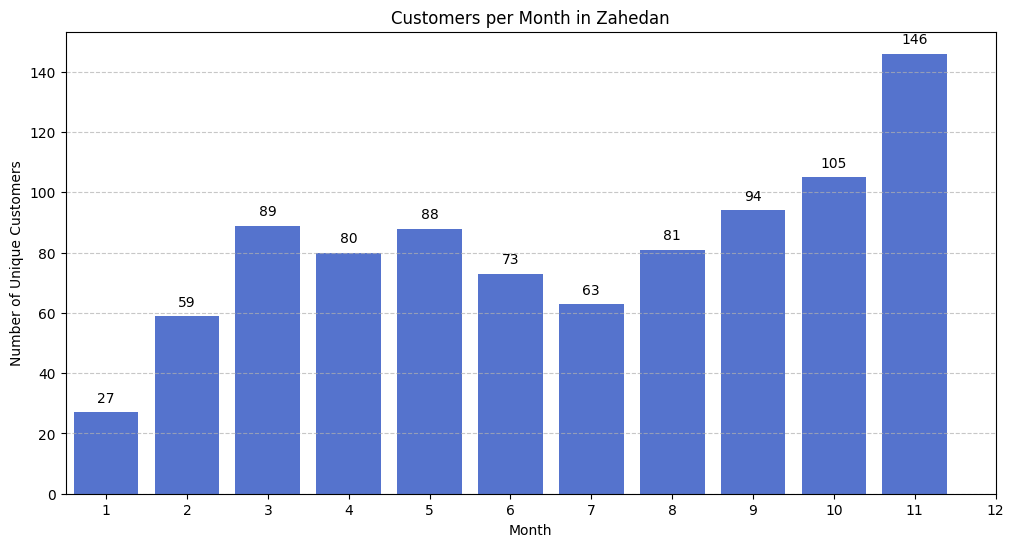

In [ ]:
#Unique customers numbers - Zahedan state

import matplotlib.pyplot as plt
import seaborn as sns

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "زاهدان")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Zahedan")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
TabrizMonths = Data[Data["State"] == "تبریز"]["MonthNumeric"].unique()
print(TabrizMonths)

[ 6  7  8  9 10 11]


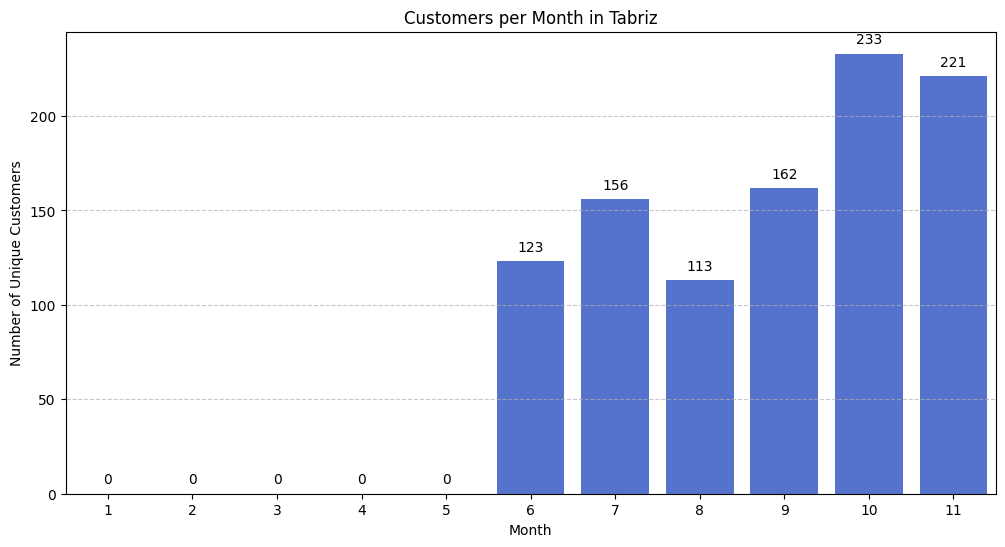

In [ ]:
#Unique customers numbers - Tabriz state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "تبریز")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months and zero values for the missing ones
AllMonths = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
AllMonths.loc[AllMonths['MonthNumeric'].isin(CustomerCounts['MonthNumeric']), 'CustomerCode'] = CustomerCounts['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=AllMonths, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Tabriz")
plt.xticks(range(len(AllMonths['MonthNumeric'])), AllMonths['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
IsfahanMonths = Data[Data["State"] == "اصفهان"]["MonthNumeric"].unique()
print(IsfahanMonths)

[ 7  8  9 10 11]


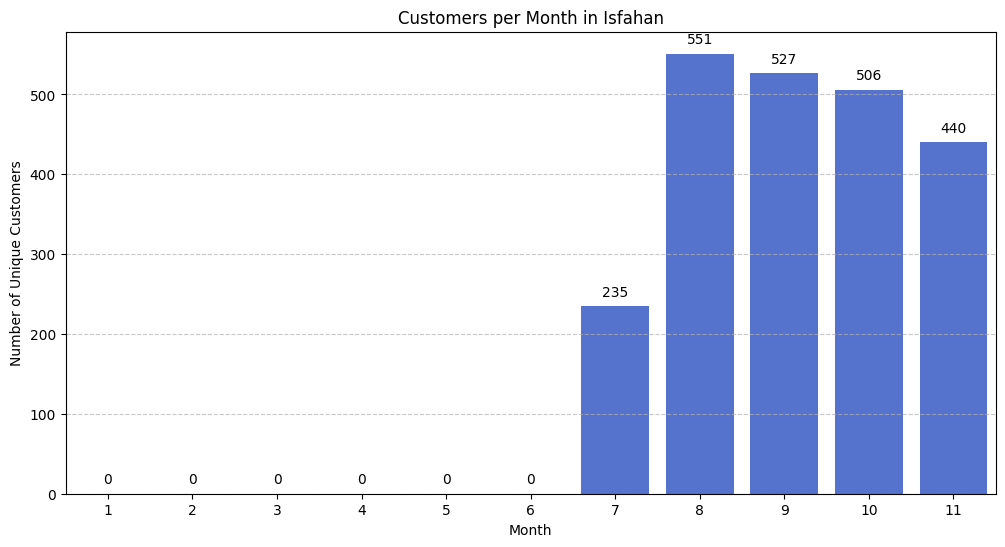

In [ ]:
#Unique customers numbers - Isfahan state

#Filter data for the last 11 months for Isfahan
LatestMonth = Data["MonthNumeric"].max()
Filtered_Isfahan = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "اصفهان")]

#Group by month and count unique customers for Isfahan
CustomerCounts_Isfahan = Filtered_Isfahan.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
AllMonthsIsfahan = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data for Isfahan
AllMonthsIsfahan.loc[AllMonthsIsfahan['MonthNumeric'].isin(CustomerCounts_Isfahan['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Isfahan['CustomerCode'].values

#Plot bar chart for Isfahan
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=AllMonthsIsfahan, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Isfahan")
plt.xticks(range(len(AllMonthsIsfahan['MonthNumeric'])), AllMonthsIsfahan['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
UrumiaMonths = Data[Data["State"] == "ارومیه"]["MonthNumeric"].unique()
print(UrumiaMonths)

[11  6  7  8  9 10]


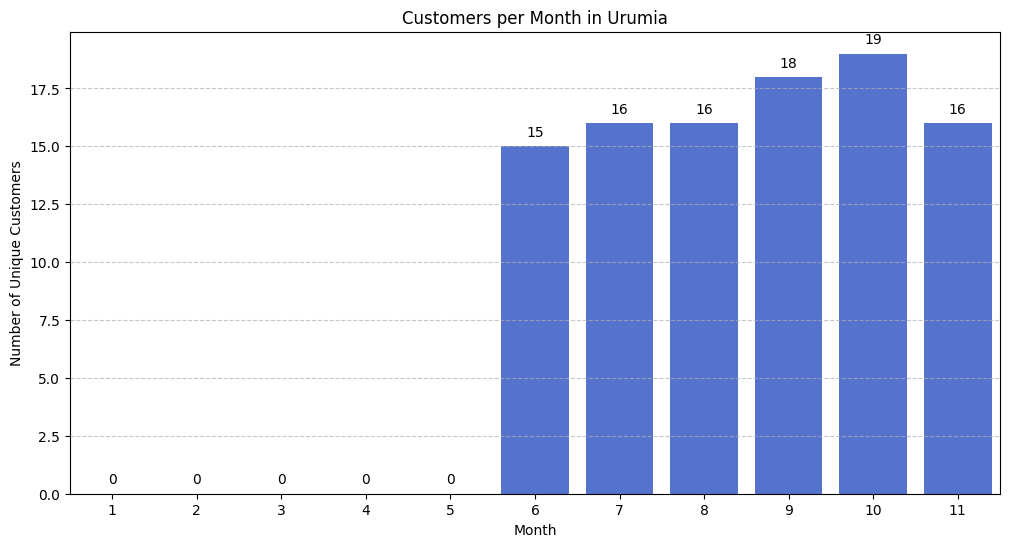

In [ ]:
#Unique customers numbers - Urumia state

#Filter data for the last 11 months for Urumia
LatestMonth = Data["MonthNumeric"].max()
Filtered_Urumia = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "ارومیه")]

#Group by month and count unique customers for Urumia
CustomerCounts_Urumia = Filtered_Urumia.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
all_months_df_Urumia = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data for Urumia
all_months_df_Urumia.loc[all_months_df_Urumia['MonthNumeric'].isin(CustomerCounts_Urumia['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Urumia['CustomerCode'].values

#Plot bar chart for Urumia
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_Urumia, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Urumia")
plt.xticks(range(len(all_months_df_Urumia['MonthNumeric'])), all_months_df_Urumia['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
ArakMonths = Data[Data["State"] == "اراک"]["MonthNumeric"].unique()
print(ArakMonths)

[ 1  2  3  4  5  6  7  8  9 10 11]


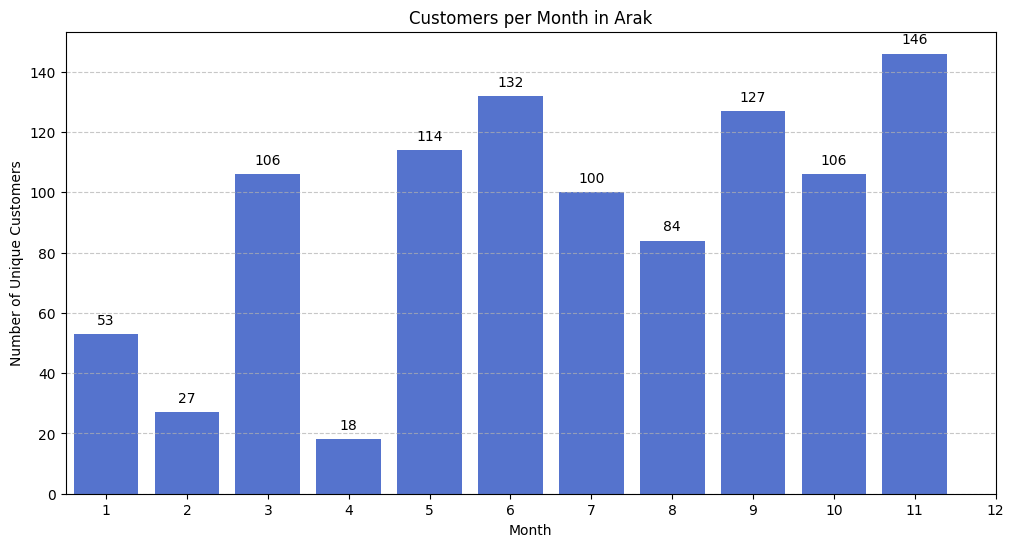

In [ ]:
#Unique customers numbers - Arak state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "اراک")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Arak")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
ArdebilMonths = Data[Data["State"] == "اردبیل"]["MonthNumeric"].unique()
print(ArdebilMonths)

[ 1  2  3  4  5  6  7  8  9 10 11]


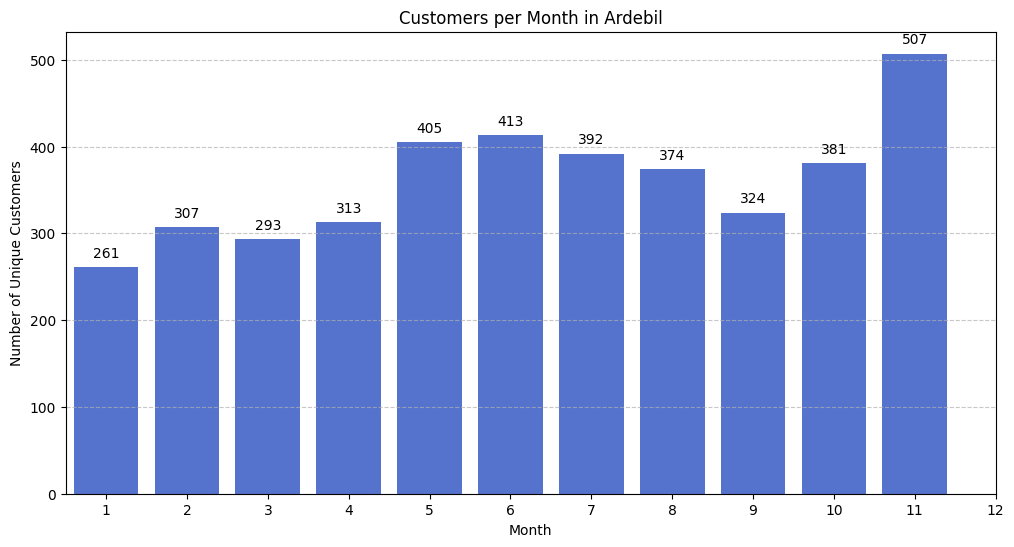

In [ ]:
#Unique customers numbers - Ardebil state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "اردبیل")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Ardebil")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
KarimiMonths = Data[Data["State"] == "کریمی"]["MonthNumeric"].unique()
print(KarimiMonths)

[ 1  2  3  4  5  6  7  8  9 10 11]


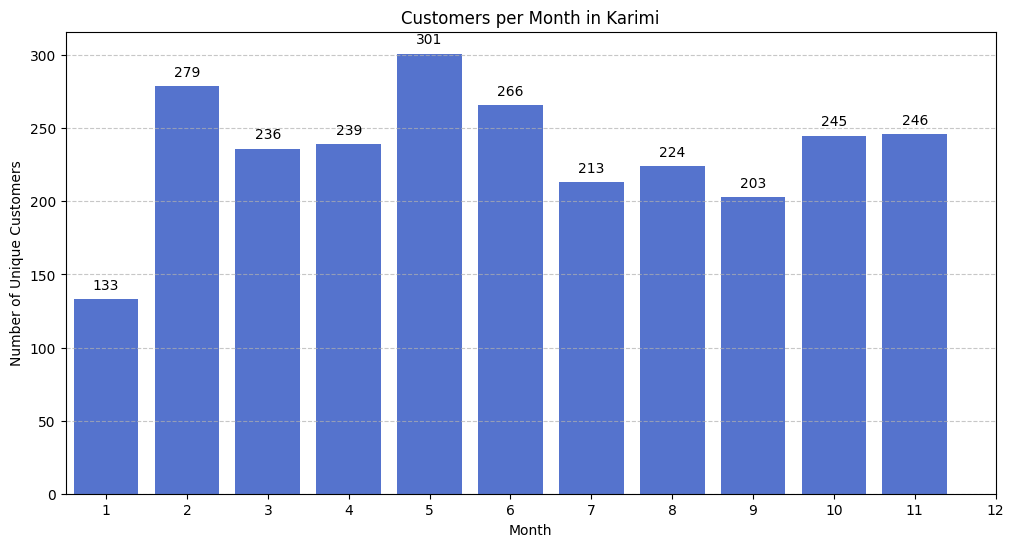

In [ ]:
#Unique customers numbers - Karimi state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "کریمی")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Karimi")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
KermanMonths = Data[Data["State"] == "کرمان"]["MonthNumeric"].unique()
print(KermanMonths)

[ 6  7  8  9 10 11]


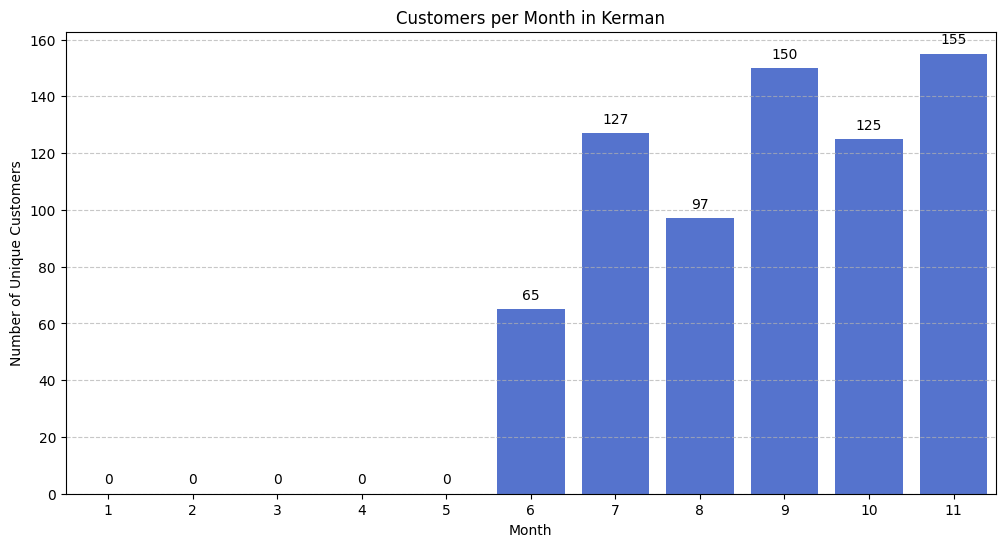

In [ ]:
#Unique customers numbers - Kerman state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "کرمان")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months and zero values for the missing ones
AllMonths = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
AllMonths.loc[AllMonths['MonthNumeric'].isin(CustomerCounts['MonthNumeric']), 'CustomerCode'] = CustomerCounts['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=AllMonths, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Kerman")
plt.xticks(range(len(AllMonths['MonthNumeric'])), AllMonths['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
KabirPouyanMonths = Data[Data["State"] == "کبیر پویان"]["MonthNumeric"].unique()
print(KabirPouyanMonths)

[ 2  1  3  4  5  6  7  9  8 11 10]


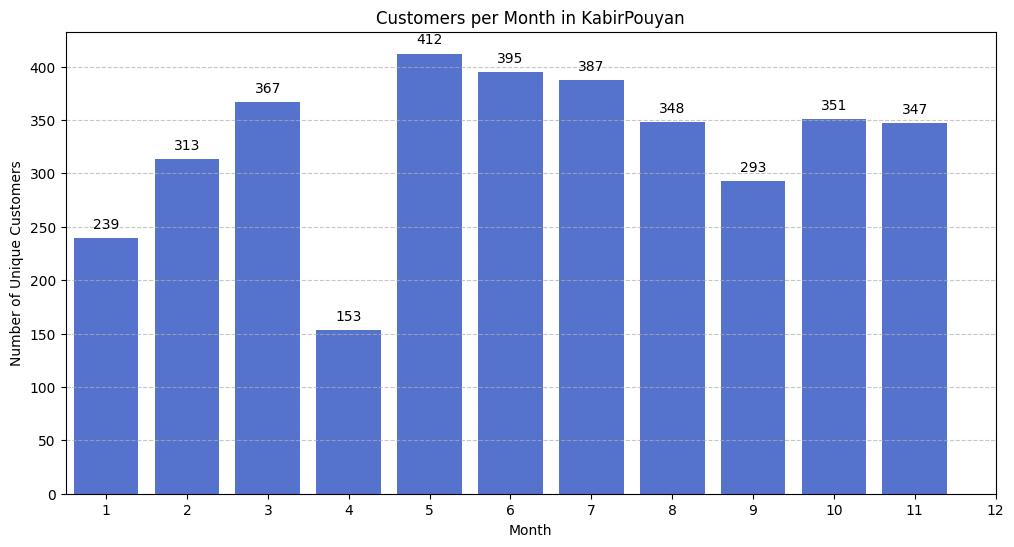

In [ ]:
#Unique customers numbers - KabirPouyan state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "کبیر پویان")]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in KabirPouyan")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
ShoushtarMonths = Data[Data["State"] == 'شوشتر']["MonthNumeric"].unique()
print(ShoushtarMonths)

[ 9 10  1  2  3  4  5  6  7  8 11]


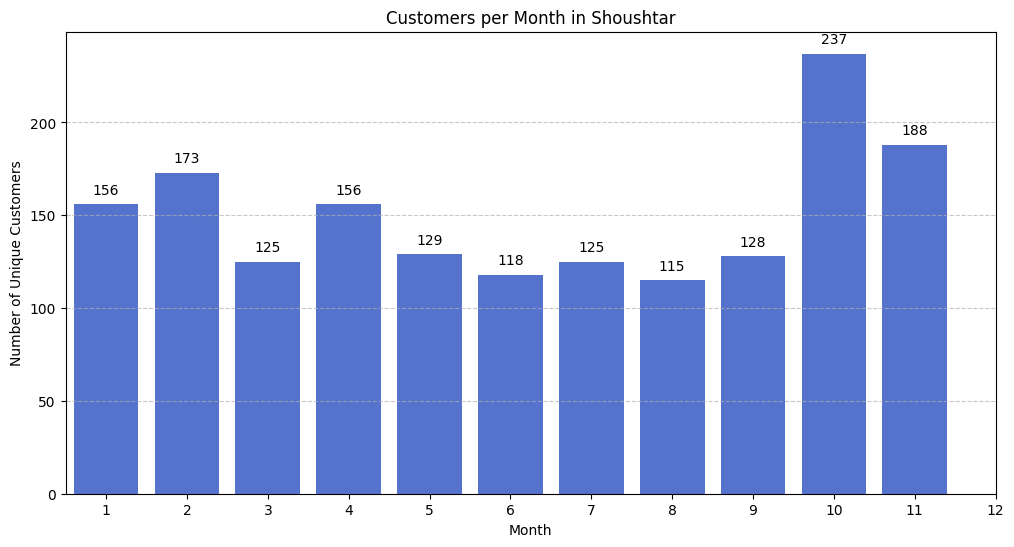

In [ ]:
#Unique customers numbers - Shoushtar state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == 'شوشتر')]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Shoushtar")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
MashhadMonths = Data[Data["State"] == 'مشهد']["MonthNumeric"].unique()
print(MashhadMonths)

[11 10  9  3  5  6  7  2  4  8  1]


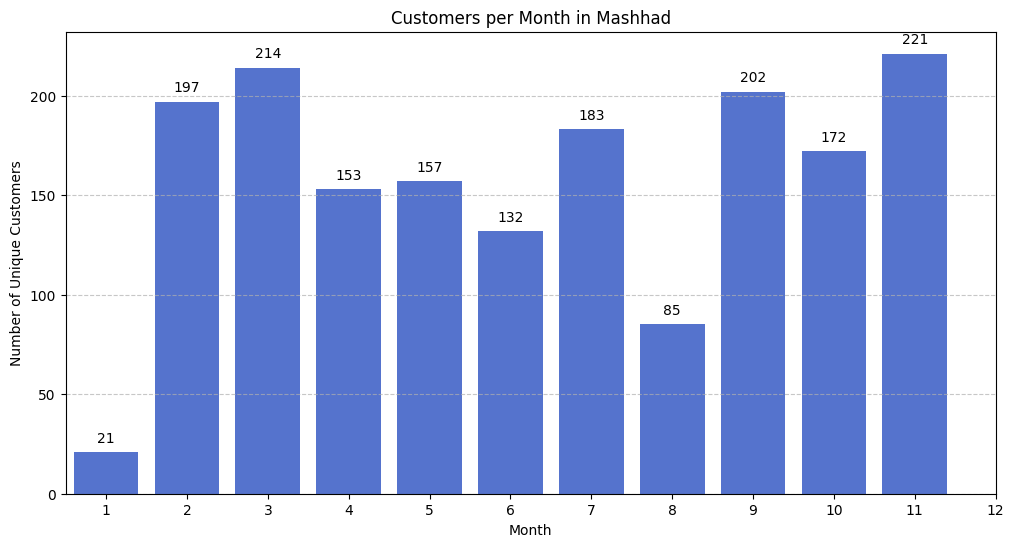

In [ ]:
#Unique customers numbers - Mashhad state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == 'مشهد')]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Mashhad")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
AhvazMonths = Data[Data["State"] == 'اهواز']["MonthNumeric"].unique()
print(AhvazMonths)

[ 1  2  3  4  5  6  7  8  9 10 11]


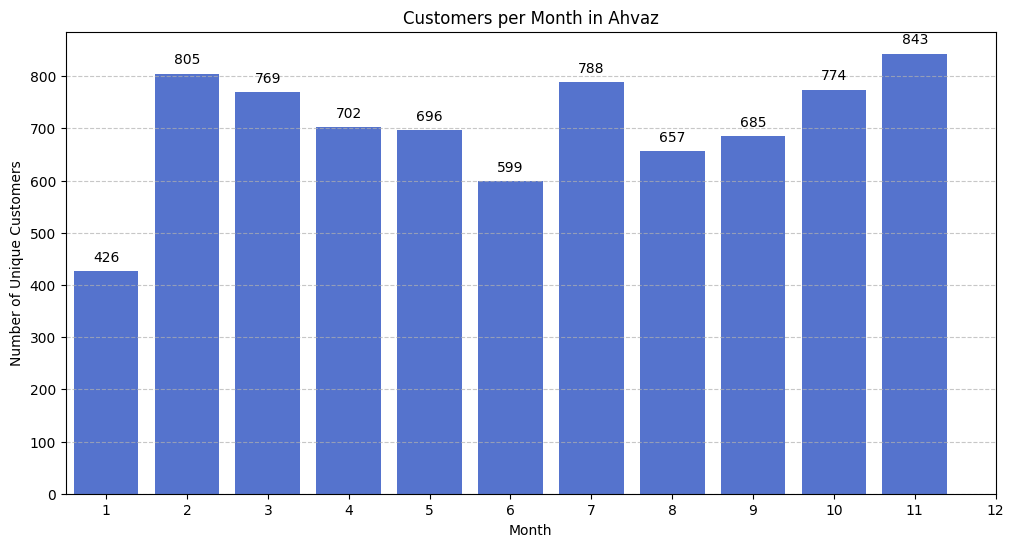

In [ ]:
#Unique customers numbers - Ahvaz state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == 'اهواز')]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Ahvaz")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
GolestanMonths = Data[Data["State"] == 'گلستان']["MonthNumeric"].unique()
print(GolestanMonths)

[ 9 10 11]


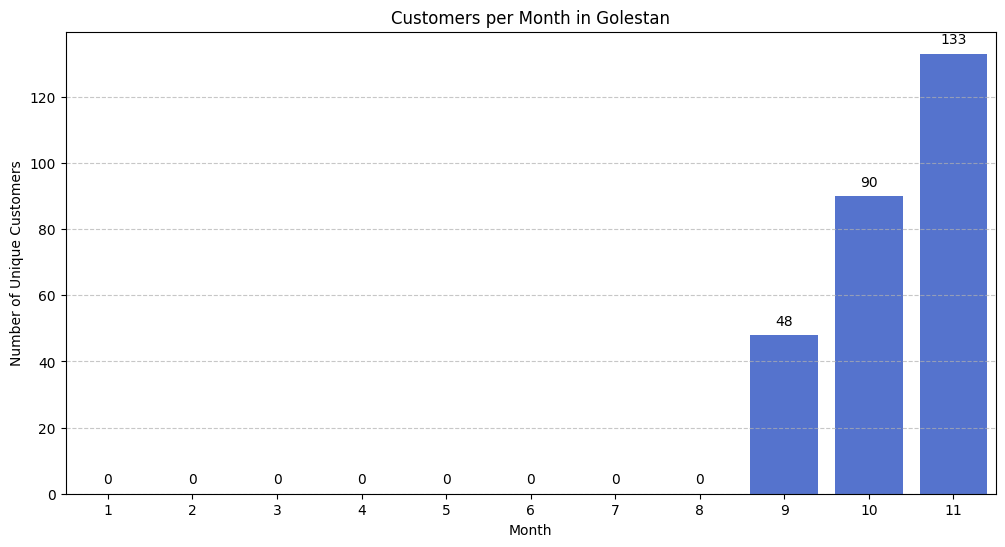

In [ ]:
#Unique customers numbers - Golestan state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered_Golestan = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "گلستان")]

#Group by month and count unique customers
CustomerCounts_Golestan = Filtered_Golestan.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
all_months_df_Golestan = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
all_months_df_Golestan.loc[all_months_df_Golestan['MonthNumeric'].isin(CustomerCounts_Golestan['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Golestan['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_Golestan, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Golestan")
plt.xticks(range(len(all_months_df_Golestan['MonthNumeric'])), all_months_df_Golestan['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
KashanMonths = Data[Data["State"] == 'کاشان']["MonthNumeric"].unique()
print(KashanMonths)

[ 9 10 11]


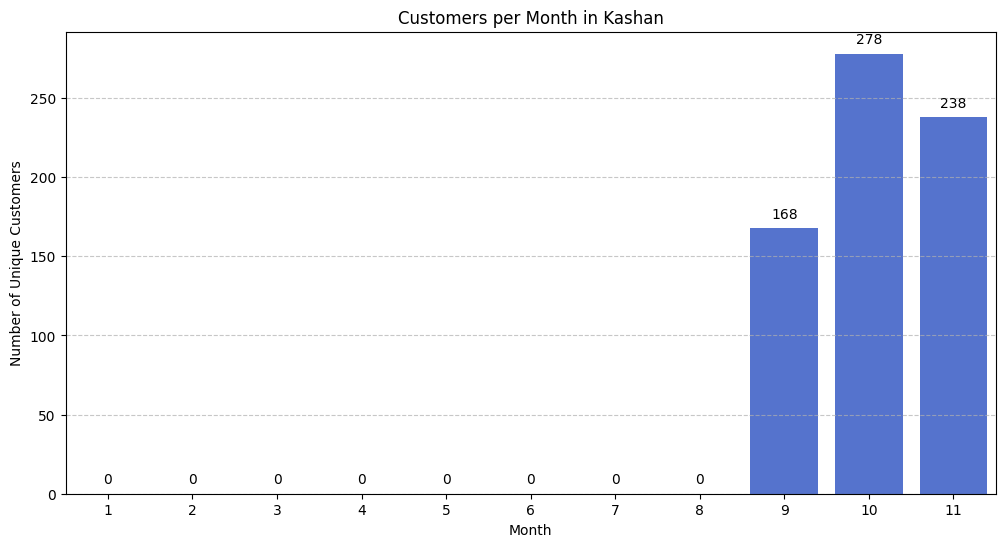

In [ ]:
#Unique customers numbers - Kashan state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered_Golestan = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "کاشان")]

#Group by month and count unique customers
CustomerCounts_Golestan = Filtered_Golestan.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
all_months_df_Golestan = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
all_months_df_Golestan.loc[all_months_df_Golestan['MonthNumeric'].isin(CustomerCounts_Golestan['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Golestan['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_Golestan, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Kashan")
plt.xticks(range(len(all_months_df_Golestan['MonthNumeric'])), all_months_df_Golestan['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
GilanMonths = Data[Data["State"] == 'گیلان']["MonthNumeric"].unique()
print(GilanMonths)

[ 7  8  9 11  4 10  2  5  1  6  3]


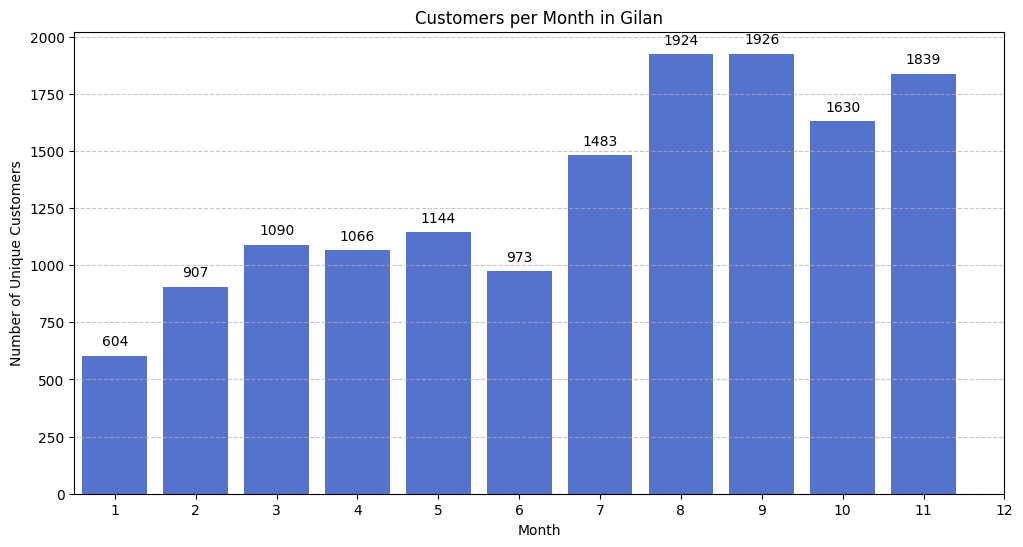

In [ ]:
#Unique customers numbers - Gilan state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == 'گیلان')]

#Group by month and count unique customers
CustomerCounts = Filtered.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=CustomerCounts, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Gilan")
month_labels = list(range(1, 13))
plt.xticks(range(LatestMonth - 11, LatestMonth + 1), month_labels)
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
MazandaranMonths = Data[Data["State"] == 'مازندران']["MonthNumeric"].unique()
print(MazandaranMonths)

[11  9  8 10  7  6  3  4  5]


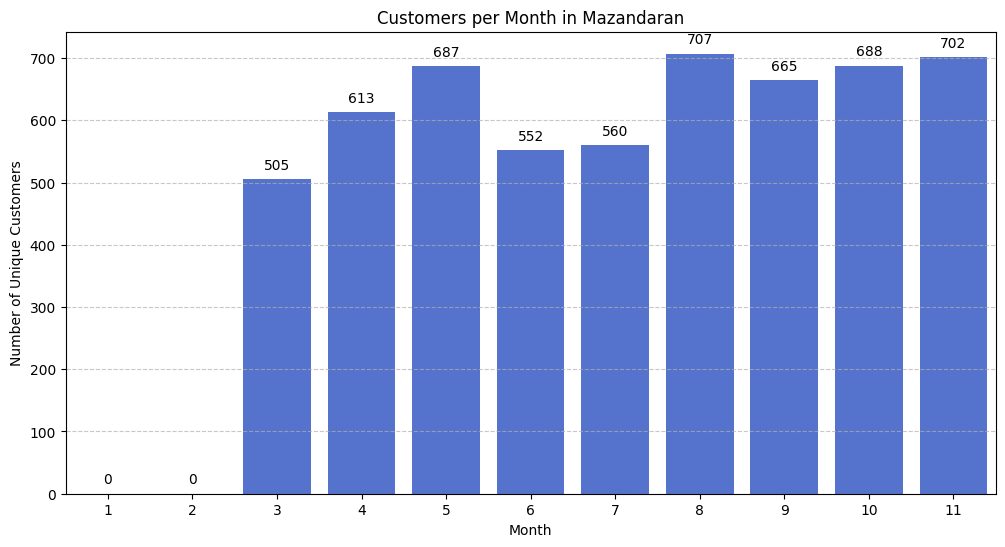

In [ ]:
#Unique customers numbers - Mazandaran state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered_Mazandaran = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "مازندران")]

#Group by month and count unique customers
CustomerCounts_Mazandaran = Filtered_Mazandaran.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
all_months_df_Mazandaran = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
all_months_df_Mazandaran.loc[all_months_df_Mazandaran['MonthNumeric'].isin(CustomerCounts_Mazandaran['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Mazandaran['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_Mazandaran, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Mazandaran")
plt.xticks(range(len(all_months_df_Mazandaran['MonthNumeric'])), all_months_df_Mazandaran['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

In [ ]:
KishMonths = Data[Data["State"] == 'کیش']["MonthNumeric"].unique()
print(KishMonths)

[ 9 10 11]


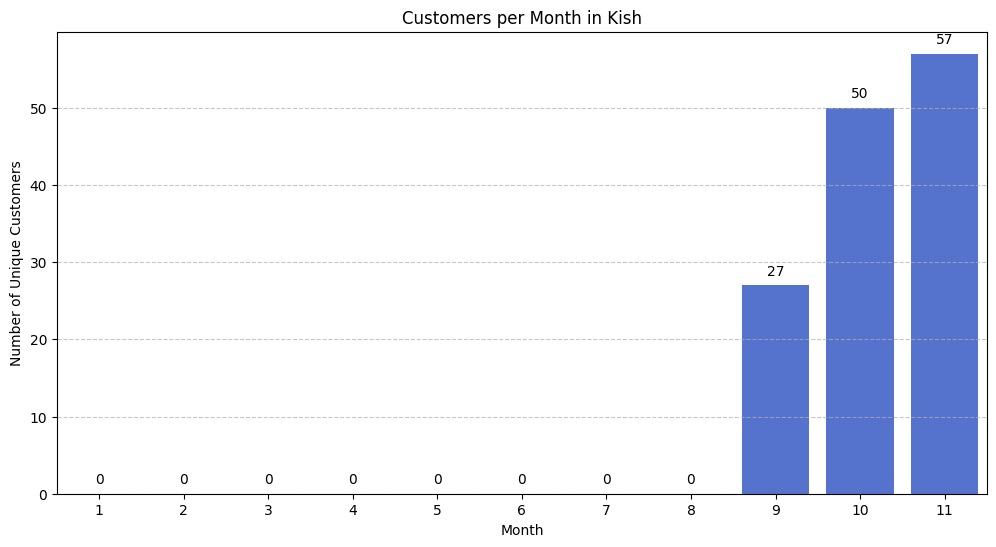

In [ ]:
#Unique customers numbers - Kish state

#Filter data for the last 11 months
LatestMonth = Data["MonthNumeric"].max()
Filtered_Golestan = Data[(Data["MonthNumeric"] >= LatestMonth - 11) & (Data["State"] == "کیش")]

#Group by month and count unique customers
CustomerCounts_Golestan = Filtered_Golestan.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to LatestMonth) and zero values for the missing ones
all_months_df_Golestan = pd.DataFrame({'MonthNumeric': range(1, LatestMonth + 1), 'CustomerCode': 0})

#Update values for the months with data
all_months_df_Golestan.loc[all_months_df_Golestan['MonthNumeric'].isin(CustomerCounts_Golestan['MonthNumeric']), 'CustomerCode'] = CustomerCounts_Golestan['CustomerCode'].values

#Plot bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_Golestan, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Customers per Month in Kish")
plt.xticks(range(len(all_months_df_Golestan['MonthNumeric'])), all_months_df_Golestan['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

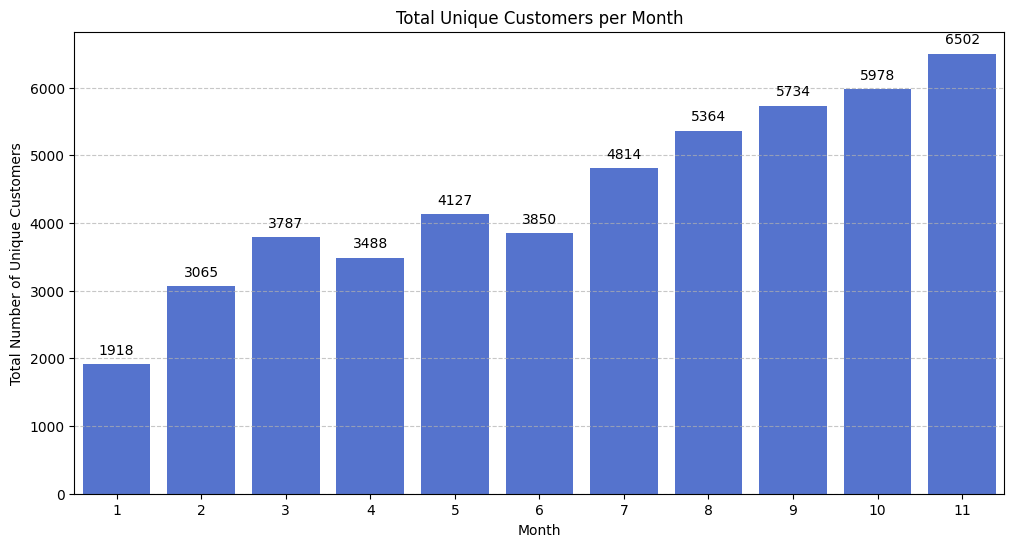

    MonthNumeric  CustomerCode
0              1          1918
1              2          3065
2              3          3787
3              4          3488
4              5          4127
5              6          3850
6              7          4814
7              8          5364
8              9          5734
9             10          5978
10            11          6502


In [ ]:
#Total Unique Customers per Month

#Group by month and count unique customers for the whole data
TotalCustomerCounts = Data.groupby("MonthNumeric")["CustomerCode"].nunique().reset_index()

#Create a DataFrame with all months (1 to 11) and zero values for missing months
all_months_df_total = pd.DataFrame({'MonthNumeric': range(1, 12), 'CustomerCode': 0})

#Update values for the months with data
all_months_df_total.loc[all_months_df_total['MonthNumeric'].isin(TotalCustomerCounts['MonthNumeric']), 'CustomerCode'] = TotalCustomerCounts['CustomerCode'].values

#Plot the bar chart
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="MonthNumeric", y="CustomerCode", data=all_months_df_total, color="royalblue")
plt.xlabel("Month")
plt.ylabel("Total Number of Unique Customers")
plt.title("Total Unique Customers per Month")
plt.xticks(range(len(all_months_df_total['MonthNumeric'])), all_months_df_total['MonthNumeric'])
plt.grid(axis="y", linestyle="--", alpha=0.7)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')
plt.show()

print(all_months_df_total)